In [2]:
import json
import urllib
import urllib.parse
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import nan
from scipy.stats import shapiro
from seaborn_qqplot import pplot
import wquantiles

In [103]:
def export_figure (title):
    plt.tight_layout()
    plt.savefig(os.path.join("figs", title + ".png"), dpi=600)
    plt.show()

In [4]:
scopus_conferences = ["CEP", "ICER",  "ITiCSE", "Koli","UKICER"]

data_dir = "data"

In [5]:
def affil_institution(affil):
#    print ("affil_detail for ", affil)
    return affil['affilname']

def affil_is_uk(affil):
    if affil['affiliation-country'] == 'United Kingdom':
        return True

In [6]:
paper_dfs = []

paper_affiliation_dfs = []

for conference in scopus_conferences:
    with open(conference + "_papers.json") as conff:
        conf_paper_files=json.load(conff)
        for paper_fname in list(conf_paper_files):
            fname = urllib.parse.quote(paper_fname, safe='')
#            print ("opening ", fname)
            with open(os.path.join(data_dir, fname + ".json")) as paperf:
                paper = json.load(paperf)
                paper_dict = {}
                try:
                    date = paper['coredata']['prism:coverDate']
                    year = date[0:4]
                    month = date[5:7]
                    paper_dict['conference'] = conference
                    # ITiCSE happens in the summer
                    # the working group reports are published the following December or January
                    if(conference == "ITiCSE" and (month=="01")):
                        year = str(int(year) - 1)
                    # apart from in 2020 when the coverdate is listed as 17 June, not December
                    if(conference == "ITiCSE" and ((month in ["12","01"]) or (date=="2020-06-17"))):
                        paper_dict['conference'] = "ITiCSE_WG"
                        print("ITiCSE date " + date + " conference" + paper_dict['conference'] + " year " + year)
                    


                    paper_dict['year'] = [year]
                    paper_dict['month'] = [month]

                    paper_dict['title'] = [paper['coredata']['dc:title'].strip()]
                    paper_dict['doi'] = [paper['coredata']['prism:doi']]
                    paper_dict['pub_date'] = [paper['coredata']['prism:coverDate']]
                    paper_dict['scopus_url'] = [paper['coredata']['prism:url']]

                    title_hash = str(hash(str(paper_dict['title'][0])))
                    paper_dict['title_hash'] = [title_hash]
                    paper_dict['key'] = "_".join([conference,year , title_hash[-6:]])
                    paper_affils = paper['affiliation']
                    try:
                        end_page = paper['coredata']['prism:endingPage']
                        start_page = paper['coredata']['prism:startingPage']
                        num_pages = int(end_page) - int(start_page) + 1
                    except Exception:
                        num_pages = nan
                    paper_dict['num_pages'] = num_pages
                    
                    if not (isinstance(paper_affils, list)):
                        paper_affils = [paper_affils]
                    
                    paper_uk_affils = filter(affil_is_uk, paper_affils)
                    
                    paper_uk_institutions = list(map(affil_institution, paper_uk_affils))

                    paper_affiliation_df = pd.DataFrame({"institution": paper_uk_institutions})
                    paper_affiliation_df['paper'] = paper_dict['key']
                    paper_affiliation_df['weight'] = 1 / len(paper_affils)
                    paper_affiliation_df['conference'] = paper_dict['conference']
                    paper_affiliation_df['doi'] = paper_dict['doi'][0]

                    try:
                        paper_dict['abstract'] = [paper['coredata']['dc:description']]
                    except Exception:
                        paper_dict['abstract'] = ''

                except KeyError as e:
                    print("KeyError ", e, " in ",fname)
                paper_df = pd.DataFrame(paper_dict)
                paper_dfs.append(paper_df)
                paper_affiliation_dfs.append(paper_affiliation_df)

#print(paper)

KeyError  'prism:doi'  in  https%3A%2F%2Fapi.elsevier.com%2Fcontent%2Fabstract%2Fscopus_id%2F85216107850
KeyError  'prism:doi'  in  https%3A%2F%2Fapi.elsevier.com%2Fcontent%2Fabstract%2Fscopus_id%2F85216101881
ITiCSE date 2025-01-23 conferenceITiCSE_WG year 2024
ITiCSE date 2025-01-23 conferenceITiCSE_WG year 2024
ITiCSE date 2025-01-23 conferenceITiCSE_WG year 2024
ITiCSE date 2025-01-23 conferenceITiCSE_WG year 2024
ITiCSE date 2025-01-23 conferenceITiCSE_WG year 2024
ITiCSE date 2025-01-23 conferenceITiCSE_WG year 2024
ITiCSE date 2025-01-23 conferenceITiCSE_WG year 2024
ITiCSE date 2025-01-23 conferenceITiCSE_WG year 2024
ITiCSE date 2025-01-23 conferenceITiCSE_WG year 2024
KeyError  'prism:doi'  in  https%3A%2F%2Fapi.elsevier.com%2Fcontent%2Fabstract%2Fscopus_id%2F85198629881
ITiCSE date 2023-12-22 conferenceITiCSE_WG year 2023
ITiCSE date 2023-12-22 conferenceITiCSE_WG year 2023
ITiCSE date 2023-12-22 conferenceITiCSE_WG year 2023
ITiCSE date 2023-12-22 conferenceITiCSE_WG year 2

In [7]:
with open("2018_CEP_papers.json") as CEP_2018f:
    CEP_2018_papers=json.load(CEP_2018f)

def CEP_2018_paper_institutions(authors):
    institution = None
    for author in authors:
        skip
        
cep_2018_paper_affiliation_dfs = []
cep_2018_paper_dfs = []
        
for paper in CEP_2018_papers:
    conference = "CEP"
    year = "2018"
    paper_dict = {}
    
    paper_dict['conference'] = conference
    paper_dict['year'] = [year]
    paper_dict['title'] = [paper['title'].strip()]
    print ("adding ", paper_dict['title'])
    paper_dict['abstract'] = [paper['abstract']]
    
    title_hash = str(hash(str(paper_dict['title'][0])))
    paper_dict['title_hash'] = [title_hash]
    paper_dict['key'] = "_".join([conference,year , paper['time']])
    

    # reverse the order of the list, because in the original if there is more than
    # one author from the same institution, the institution is specified on the list one
    prev_institution = None
    paper_institutions = []
    for author in reversed(paper['authors']):
        if 'institution' in author.keys() and len(author['institution'])>0:
            institution = author['institution'].strip()
            prev_institution = institution 
        else:
            institution = prev_institution
        if not institution:
            print ("no institution for " + paper_dict['key'])
            continue
        paper_institutions.append(institution)
    paper_affiliation_df = pd.DataFrame({"institution": paper_institutions})
    paper_affiliation_df['paper'] = paper_dict['key']
    paper_affiliation_df['weight'] = 1 / len(paper['authors'])
    paper_affiliation_df['conference'] = paper_dict['conference']

    cep_2018_paper_affiliation_dfs.append(paper_affiliation_df)
    paper_df = pd.DataFrame(paper_dict)
    cep_2018_paper_dfs.append(paper_df)
    
cep_2018_paper_affiliation_dfs
cep_2018_paper_dfs

adding  ['Sustainable Computing: a home for LSEP, Commercial practice and Research skills']
adding  ['Including IT service management in the Computing curriculum: a caricature approach.']
adding  ['Intelligent Agents for Education']
adding  ['"It\'s only a computing project - so there can\'t be any ethical issues..."']
adding  ['No money worries: new student identities for Graduate Level Apprentices']
adding  ['The enemies within - inhibitors to learning']
adding  ['Blocks-based programming for introductory programming in Python']
adding  ['Enhancing computer programming skills through Virtual Reality']
adding  ['Supporting the learning of programming with the PRIMM approach']
adding  ['Self regulated Learning in Engineering and Computing Classrooms']
adding  ['Learner engagement in larger computer science classes']
adding  ["Promoting learning by going against students' preference to learning"]
adding  ['The Associate Student Project celebrates five years of student transitions from f

[  conference  year                                              title  \
 0        CEP  2018  Sustainable Computing: a home for LSEP, Commer...   
 
                                             abstract            title_hash  \
 0  This talk will describe the use of global chal...  -8155468359466265074   
 
            key  
 0  CEP_2018_1a  ,
   conference  year                                              title  \
 0        CEP  2018  Including IT service management in the Computi...   
 
                                             abstract            title_hash  \
 0  IT service management (itSM) is as important t...  -7935769216177683698   
 
            key  
 0  CEP_2018_1b  ,
   conference  year                             title  \
 0        CEP  2018  Intelligent Agents for Education   
 
                                             abstract            title_hash  \
 0  The use of CAs can be applied to educational s...  -3299812546724838970   
 
            key  
 0  CEP_2018

In [8]:
papers_df = pd.concat(paper_dfs + cep_2018_paper_dfs)
papers_df.set_index('key', inplace=True)
# remove WG pre-reports
papers_df = papers_df[(papers_df.num_pages > 2) | (papers_df.conference != "ITiCSE")]

In [114]:
len(papers_df[(papers_df.conference=="CEP") & (papers_df.year!="2018")] )

83

In [119]:
len(papers_df)

310

In [9]:
for conf in papers_df.conference.unique():
    print ("pubDate for ", conf, papers_df[papers_df.conference == conf]['pub_date'].unique() )

pubDate for  CEP ['2025-01-07' '2024-01-05' '2023-01-06' '2022-01-06' '2021-01-07'
 '2020-01-09' '2019-01-09' nan]
pubDate for  ICER ['2024-08-13' nan '2023-08-07' '2022-08-03' '2021-08-16' '2020-08-10'
 '2019-07-30']
pubDate for  ITiCSE_WG ['2025-01-23' '2023-12-22' '2022-12-27' '2021-12-28' '2020-06-17'
 '2019-12-18']
pubDate for  ITiCSE ['2024-07-03' '2023-06-29' '2022-07-07' '2021-06-26' '2020-06-15'
 '2019-07-02']
pubDate for  Koli ['2024-11-13' '2023-11-13' '2022-11-17' '2021-11-17' '2020-11-19'
 '2019-11-21']
pubDate for  UKICER ['2024-11-06' nan '2023-09-07' '2022-09-01' '2021-09-02' '2020-09-03'
 '2019-09-05']


In [10]:
papers_df[papers_df['num_pages'].isnull()].groupby('conference').count()

,year,month,title,doi,pub_date,scopus_url,title_hash,num_pages,abstract
conference,,,,,,,,,
CEP,56,36,56,36,36,36,56,0,56
ICER,4,4,4,2,2,2,2,0,2
Koli,27,27,27,27,27,27,27,0,27
UKICER,80,80,80,76,76,76,76,0,76


In [11]:
papers_df.groupby('conference').count()

,year,month,title,doi,pub_date,scopus_url,title_hash,num_pages,abstract
conference,,,,,,,,,
CEP,103,83,103,83,83,83,103,47,103
ICER,28,28,28,26,26,26,26,24,26
ITiCSE,34,34,34,34,34,34,34,34,34
ITiCSE_WG,31,31,31,31,31,31,31,31,31
Koli,27,27,27,27,27,27,27,0,27
UKICER,87,87,87,83,83,83,83,7,83


In [118]:
affiliations_df = pd.concat(paper_affiliation_dfs + cep_2018_paper_affiliation_dfs)
# remove all papers excluded
#included_paper_ids = papers_df['key']

affiliations_df = affiliations_df[affiliations_df.paper.isin(papers_df.index)]
len(affiliations_df['institution'].unique())

83

In [117]:
affiliations_df[affiliations_df.conference=="CEP"]['institution'].unique()

array(['University of Glasgow', 'The Open University',
       'Swansea University', 'University of Strathclyde',
       'Arunside Primary School', 'University of West London',
       'Abertay University', 'Altitude Foundation',
       'The University of Manchester', 'The University of Edinburgh',
       'Durham University', 'Manchester Metropolitan University',
       "Queen's University Belfast", 'University of Cambridge',
       'Raspberry Pi Foundation', "King's College London",
       'Coventry University', 'University of Northumbria',
       'London School of Economics and Political Science',
       'University of Bath, Department of Computer Science',
       'University of Sunderland', 'University of Huddersfield',
       'Ulster University', 'Newcastle University',
       'Glasgow Caledonian University', 'University of Bath',
       'Birmingham City University', 'Cardiff University',
       'University of Central Lancashire',
       'School of Computing and Communications, Lanca

In [13]:
affiliations_df[affiliations_df.institution=="London School of Economics and Political Science"]

,institution,paper,weight,conference,doi
0,London School of Economics and Political Science,CEP_2022_335641,0.5,CEP,10.1145/3498343.3498353


In [14]:
affiliations_df[affiliations_df.conference=="ITiCSE"].sort_values('weight')

,institution,paper,weight,conference,doi
1,Glasgow Caledonian University,ITiCSE_2020_747152,0.090909,ITiCSE,10.1145/3341525.3394992
0,University of Lincoln,ITiCSE_2020_747152,0.090909,ITiCSE,10.1145/3341525.3394992
1,Raspberry Pi Foundation,ITiCSE_2020_429388,0.111111,ITiCSE,10.1145/3341525.3387418
0,University of Glasgow,ITiCSE_2020_429388,0.111111,ITiCSE,10.1145/3341525.3387418
0,The Open University,ITiCSE_2020_777862,0.142857,ITiCSE,10.1145/3341525.3387423
0,Aberystwyth University,ITiCSE_2019_103287,0.166667,ITiCSE,10.1145/3304221.3319783
0,University of Bath,ITiCSE_2024_012201,0.200000,ITiCSE,10.1145/3649217.3653578
1,The Open University,ITiCSE_2024_012201,0.200000,ITiCSE,10.1145/3649217.3653578
2,University of Northumbria,ITiCSE_2024_012201,0.200000,ITiCSE,10.1145/3649217.3653578
3,Swansea University,ITiCSE_2024_012201,0.200000,ITiCSE,10.1145/3649217.3653578


In [15]:
for conference in ["CEP","UKICER","ITiCSE","ITiCSE_WG","Koli","ICER"]:
    print("conference ", conference)
    conf_affils = affiliations_df[affiliations_df["conference"]==conference]
    conf_total_affils = conf_affils['weight'].sum()
    print("conf_total_affils ", type(conf_total_affils), conf_total_affils)
    conf_affils_group = conf_affils.groupby("institution").sum()['weight'].sort_values(ascending=False).reset_index()
#    conf_affils_group['total'] = conf_total_affils 
    conf_affils_group['percent'] = conf_affils_group['weight']/conf_total_affils
    print(conf_affils_group.head(11).to_latex(float_format="%.2f"))

conference  CEP
conf_total_affils  <class 'numpy.float64'> 96.0
\begin{tabular}{llrr}
\toprule
{} &                   institution &  weight &  percent \\
\midrule
0  &         University of Glasgow &   12.42 &     0.13 \\
1  &     University of Strathclyde &    6.83 &     0.07 \\
2  &            Swansea University &    6.59 &     0.07 \\
3  &           The Open University &    6.50 &     0.07 \\
4  &          Newcastle University &    6.00 &     0.06 \\
5  &             Durham University &    6.00 &     0.06 \\
6  &           Coventry University &    5.00 &     0.05 \\
7  &  The University of Manchester &    3.00 &     0.03 \\
8  &     University of Northumbria &    2.59 &     0.03 \\
9  &   The University of Edinburgh &    2.00 &     0.02 \\
10 &            University of Hull &    2.00 &     0.02 \\
\bottomrule
\end{tabular}

conference  UKICER
conf_total_affils  <class 'numpy.float64'> 83.31666666666666
\begin{tabular}{llrr}
\toprule
{} &                  institution &  weight &  per

/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_84958/1922920375.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(conf_affils_group.head(11).to_latex(float_format="%.2f"))
/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_84958/1922920375.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(conf_affils_group.head(11).to_latex(float_format="%.2f"))
/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_84958/1922920375.py:9: FutureWarnin

In [16]:
institutions_df = pd.read_excel("institutions.xlsx", dtype=str)
#institutions_df

In [17]:
affiliations_domain = pd.merge(affiliations_df, institutions_df, how="left", left_on='institution', right_on='name')
affiliations_domain

,institution,paper,weight,conference,doi,domain,name
0,University of Glasgow,CEP_2025_319252,1.000000,CEP,10.1145/3702212.3702220,gla,University of Glasgow
1,The Open University,CEP_2025_565122,0.500000,CEP,10.1145/3702212.3702223,NaN,NaN
2,Swansea University,CEP_2025_565122,0.500000,CEP,10.1145/3702212.3702223,swansea,Swansea University
3,University of Strathclyde,CEP_2025_775741,0.500000,CEP,10.1145/3702212.3702217,strath,University of Strathclyde
4,University of Glasgow,CEP_2025_775741,0.500000,CEP,10.1145/3702212.3702217,gla,University of Glasgow
...,...,...,...,...,...,...,...
433,University of Kent,CEP_2018_7a,0.333333,CEP,NaN,kent,University of Kent
434,University of Kent,CEP_2018_7a,0.333333,CEP,NaN,kent,University of Kent
435,University of Kent,CEP_2018_7a,0.333333,CEP,NaN,kent,University of Kent
436,Durham University,CEP_2018_7b,1.000000,CEP,NaN,durham,Durham University


In [18]:
def fix_affiliation (row):
    if not (isinstance(row['domain'], float)):
        return row['domain']
    for index, inst_row in institutions_df.iterrows():
        if inst_row['name'] in row['institution']:
            return inst_row['domain']
    if row['doi'] == "10.1145/3631802.3631803":
        return "cam"
    if row['doi'] == "10.1145/3649217.3653622":
        return "warwick"
    if row['doi'] == "10.1145/3587103.3594143":
        return "citystgeorges"
    if row['doi'] == "10.1145/3304221.3325580":
        return "warwick"
    if row['doi'] == "10.1145/3501385.3543960":
        return "cam"
    
affiliations_domain['domain'] = affiliations_domain.apply(fix_affiliation, axis=1)

affiliations_domain[affiliations_domain.domain.isnull()]

,institution,paper,weight,conference,doi,domain,name
331,IBM United Kingdom Limited,UKICER_2023_744912,0.166667,UKICER,10.1145/3610969.3611121,None,NaN
335,ForgeRock,UKICER_2023_744912,0.166667,UKICER,10.1145/3610969.3611121,None,NaN
400,Barefoot Computing,UKICER_2019_970418,0.333333,UKICER,10.1145/3351287.3351291,None,NaN
415,"Information Technology University, Lahore",CEP_2018_3b,0.250000,CEP,NaN,None,NaN


In [160]:
for conference in scopus_conferences + ["ITICSE_WG"]:
    print (conference)
    print (affiliations_domain[affiliations_domain.conference==conference].groupby('institution').sum().sort_values('weight', ascending=False))

CEP
                                                       weight
institution                                                  
University of Glasgow                               12.416667
University of Strathclyde                            6.833333
Swansea University                                   6.592857
The Open University                                  6.500000
Newcastle University                                 6.000000
Durham University                                    6.000000
Coventry University                                  5.000000
The University of Manchester                         3.000000
University of Northumbria                            2.592857
The University of Edinburgh                          2.000000
University of Hull                                   2.000000
Queen's University Belfast                           2.000000
Falmouth University                                  2.000000
King's College London                                2.000000
Univ

Statistics=0.892, p=0.000
Sample does not look Gaussian (reject H0)


/Users/dcs0spb/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


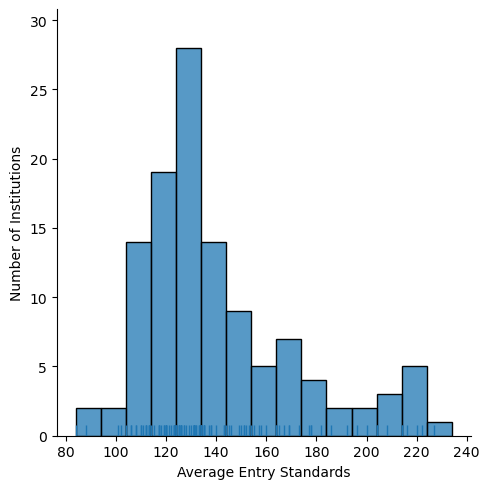

In [22]:
cug_df = pd.read_csv("Complete_University_Guide_Computer_Science_2025.csv", skiprows=4)

# Is Entry Standards data normally distributed? (Shapiro-Wilk)

stat, p = shapiro(cug_df['Entry Standards'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')


cug_domain = pd.merge(cug_df, institutions_df, how="left", left_on='Institution', right_on='name')
len(cug_domain[cug_domain.domain.notnull()])

def fix_institution(row, colname):
    if not (isinstance(row['domain'], float)):
        return row['domain']
    for index, inst_row in institutions_df.iterrows():
        if inst_row['name'] in row[colname]:
            return inst_row['domain']
    
def fix_cug_institution (row):
    return fix_institution(row, 'Institution')

    
cug_domain['domain'] = cug_domain.apply(fix_cug_institution, axis=1)

cug_domain[cug_domain.domain.isnull()]

g = sns.displot(data=cug_df, x="Entry Standards", kde=False, rug=True, binwidth = 10)

g.set_axis_labels("Average Entry Standards", "Number of Institutions")

export_figure("cug_entry_standards_hist")

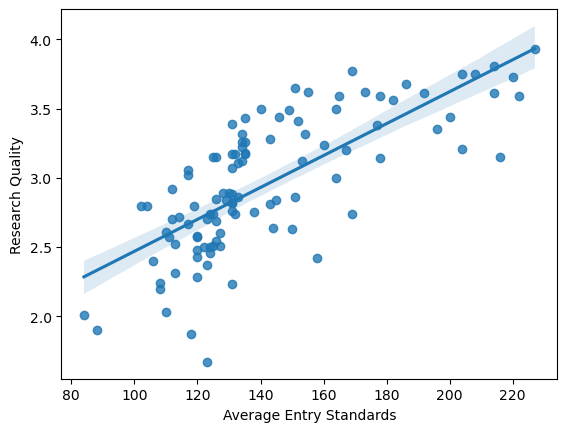

In [23]:
ax = sns.regplot(data=cug_df, x="Entry Standards", y="Research Quality")
ax.set(xlabel='Average Entry Standards', ylabel='Research Quality')
export_figure('entry_standards_research_quality')

In [24]:
affiliations_cug = affiliations_domain.merge(cug_domain[pd.notnull(cug_domain.domain)], how="left", on="domain")
affiliations_cug
affiliations_cug[affiliations_cug['Entry Standards'].isnull()].groupby('institution').sum()

,weight,Rank,Entry Standards,Student Satisfaction,Research Quality,Continuation,Graduate prospects outcomes,Graduate prospects on track,Overall Score
institution,,,,,,,,,
Altitude Foundation,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arunside Primary School,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barefoot Computing,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Birmingham Newman University,0.303114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ForgeRock,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IBM United Kingdom Limited,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Information Technology University, Lahore",0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
London School of Economics and Political Science,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Raspberry Pi Foundation,8.201923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
student_numbers = pd.read_csv("HESA-table-37.csv", skiprows=20)

student_numbers['Number'] = pd.to_numeric(student_numbers.Number)

# print(student_numbers['Category'].unique())
# print(student_numbers['Academic Year'].unique())

student_numbers = student_numbers[(student_numbers['Category'] == '121 IT, systems sciences & computer software engineering') &
                                  (student_numbers['Academic Year'] == '2023/24') &
                                  (student_numbers['UKPRN'].notnull()) &
                                  (student_numbers['Country of HE provider'] == 'All') &
                                  (student_numbers['Number']>0)
                                 ]
student_numbers['HE provider'] = student_numbers['HE provider'].str.replace("The University","University")

student_numbers_domain = pd.merge(student_numbers, institutions_df, how="left", left_on='HE provider', right_on='name')


def fix_numbers_institution (row):
    return fix_institution(row, 'HE provider')

    
student_numbers_domain['domain'] = student_numbers_domain.apply(fix_numbers_institution, axis=1)

student_numbers_domain = student_numbers_domain[['HE provider', 'Academic Year', 'Number', 'domain']]
print(len(student_numbers_domain[student_numbers_domain.domain.notnull()]))

student_numbers_domain[student_numbers_domain.domain.isnull()].sort_values('Number')

#student_numbers.sort_values('Number')

121


,HE provider,Academic Year,Number,domain
72,LIBF Limited,2023/24,5,None
34,Coleg Gwent,2023/24,5,None
77,Grŵp Llandrillo Menai,2023/24,5,None
21,University College of Osteopathy,2023/24,10,None
28,Cardiff and Vale College,2023/24,10,None
126,University Centre Peterborough,2023/24,15,None
60,Institute of Contemporary Music Performance,2023/24,15,None
89,Grŵp NPTC Group,2023/24,20,None
59,ICON College of Technology and Management,2023/24,40,None
129,University of Law,2023/24,45,None


In [26]:
#cug_domain_numbers = cug_domain.merge(student_numbers_domain[pd.notnull(student_numbers_domain.domain)], how="left", on="domain")
cug_domain_numbers = cug_domain.merge(student_numbers_domain, how="left", on="domain")

cug_domain_numbers[cug_domain_numbers.Number.isnull()]

,Rank,Institution,Entry Standards,Student Satisfaction,Research Quality,Continuation,Graduate prospects outcomes,Graduate prospects on track,Overall Score,domain,name,HE provider,Academic Year,Number
2,3,Imperial College London,227,3.16,3.93,93.8,97.0,90.0,96.6,imperial,Imperial College London,NaN,NaN,NaN
6,7,UCL (University College London),208,2.88,3.75,95.1,93.0,80.0,92.3,ucl,NaN,NaN,NaN,NaN
95,95,University of Buckingham,113,3.07,NaN,90.5,78.0,88.0,74.5,buckingham,University of Buckingham,NaN,NaN,NaN


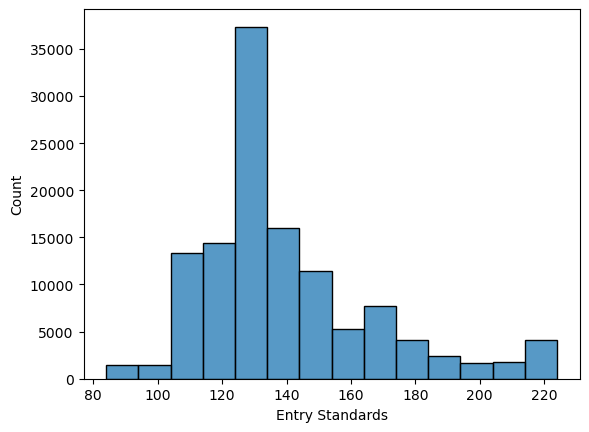

In [27]:
# weighted
sns.histplot(data=cug_domain_numbers, x="Entry Standards", binwidth = 10, weights=cug_domain_numbers.Number)
export_figure("cug_entry_standards_weighted_hist")

<Axes: xlabel='Entry Standards', ylabel='Proportion'>

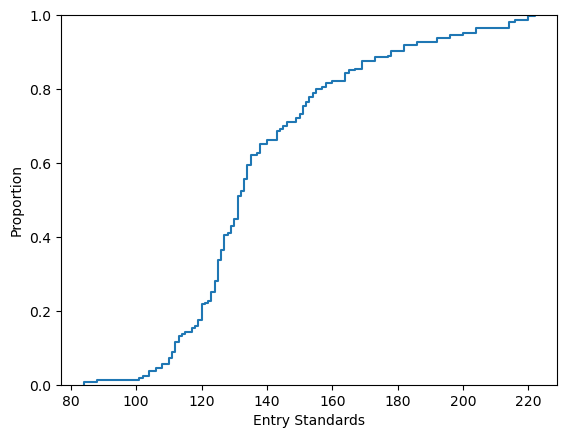

In [28]:
sns.ecdfplot(data=cug_domain_numbers, x="Entry Standards", weights=cug_domain_numbers.Number)

In [29]:
affiliations_cug_numbers = affiliations_cug.merge(student_numbers_domain[pd.notnull(student_numbers_domain.domain)], how="left", on="domain")
affiliations_cug_numbers[affiliations_cug_numbers.Number.isnull()]['institution'].unique()

array(['Arunside Primary School', 'Altitude Foundation',
       'Raspberry Pi Foundation',
       'London School of Economics and Political Science',
       'The Alan Turing Institute', 'The Scottish Tech Army',
       "St Mark's West Essex Catholic School",
       'IBM United Kingdom Limited', 'ForgeRock', 'Theatr Na NOg',
       'Barefoot Computing', 'Information Technology University, Lahore'],
      dtype=object)

In [30]:
affiliations_cug
ecdf_affil_df = affiliations_cug[['conference','domain', 'weight', 'Entry Standards']]
ecdf_affil_df.columns=['source','domain','weight','Entry Standards']

ecdf_cug_df = cug_domain_numbers.copy()[['domain','Number', 'Entry Standards']]
ecdf_cug_df['source']='CUG (weighted)'
ecdf_cug_df.columns=['domain','weight','Entry Standards','source']

ecdf_cug_unweighted_df = cug_domain_numbers.copy()[['domain', 'Entry Standards']]
ecdf_cug_unweighted_df['weight']=1
ecdf_cug_unweighted_df['source']='CUG (unweighted)'
ecdf_cug_unweighted_df.columns=['domain','Entry Standards','weight','source']



ecdf_df = pd.concat([ecdf_affil_df, ecdf_cug_df, ecdf_cug_unweighted_df]).reset_index()
ecdf_df

,index,source,domain,weight,Entry Standards
0,0,CEP,gla,1.0,214.0
1,1,CEP,open,0.5,NaN
2,2,CEP,swansea,0.5,134.0
3,3,CEP,strath,0.5,204.0
4,4,CEP,gla,0.5,214.0
...,...,...,...,...,...
672,114,CUG (unweighted),wlv,1.0,84.0
673,115,CUG (unweighted),londonmet,1.0,88.0
674,116,CUG (unweighted),uos,1.0,121.0
675,117,CUG (unweighted),uca,1.0,138.0


/Users/dcs0spb/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_84958/4197201068.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


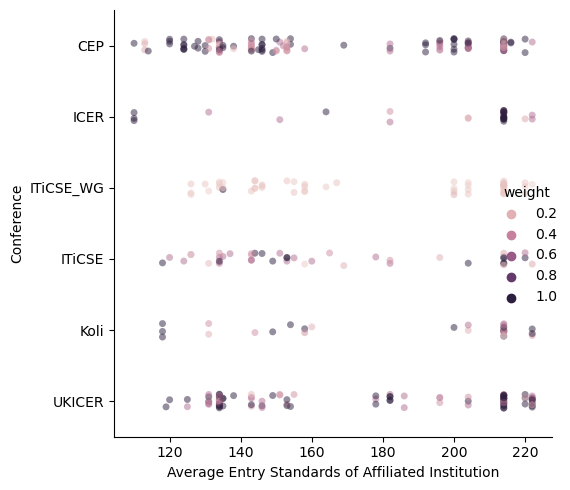

In [104]:
g = sns.catplot(data=affiliations_cug,x="Entry Standards", y="conference", hue="weight", alpha=0.5)
g.set_axis_labels("Average Entry Standards of Affiliated Institution", "Conference")

export_figure('affiliation_entry_standards')

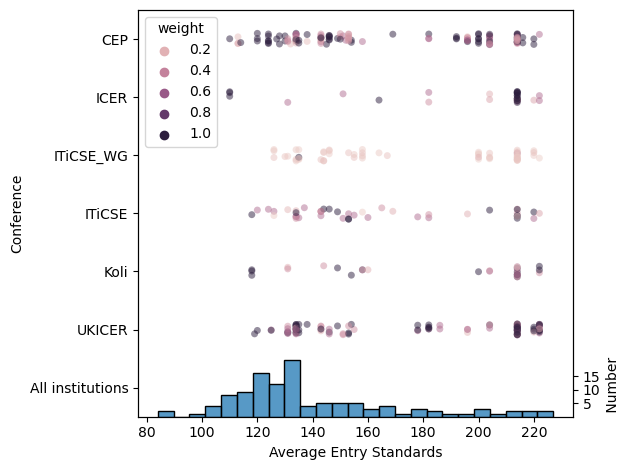

In [153]:
affiliations_all_blank = pd.DataFrame({"conference": ["All institutions"]})

fig, ax = plt.subplots()
sns.stripplot(data=pd.concat([affiliations_cug, affiliations_all_blank]),x="Entry Standards", y="conference", hue="weight", alpha=0.5, ax=ax)
ax.set_xlabel("Average Entry Standards")
ax.set_ylabel("Conference")

#sns.move_legend(ax, "bottom left")
ax2 = ax.twinx()
ax2.set_ylim(top=150)
ax2.set_yticks([5,10,15])
#ax2.set_ylim(top=150000)
#ax2.set_yticks([5,10,15])
ax2.set_ylabel(' Number', loc='bottom')


#sns.histplot(data=cug_domain_numbers, x="Entry Standards", binwidth = 5, weights=cug_domain_numbers.Number, ax=ax2)
sns.histplot(data=cug_df, x="Entry Standards", bins = 25, ax=ax2)
export_figure("affil_entry_standards_strip_with_hist")

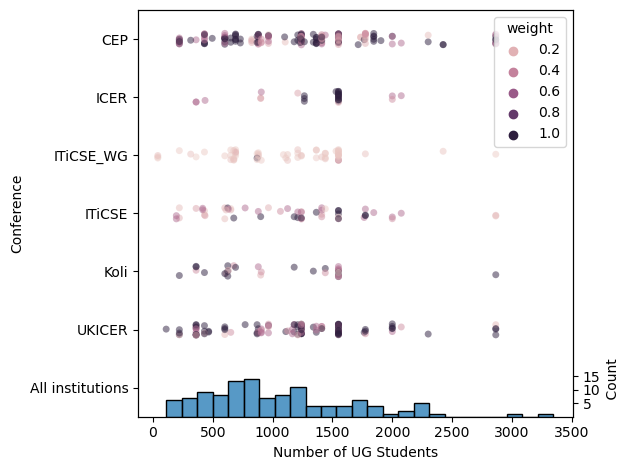

In [144]:
affiliations_all_blank = pd.DataFrame({"conference": ["All institutions"]})

fig, ax = plt.subplots()
sns.stripplot(data=pd.concat([affiliations_cug_numbers, affiliations_all_blank]),x="Number", y="conference", hue="weight", alpha=0.5, ax=ax)
ax.set_xlabel("Number of UG Students")
ax.set_ylabel("Conference")

sns.move_legend(ax, "upper right", bbox_to_anchor=(1, 1))
ax2 = ax.twinx()
ax2.set_ylim(top=150)
ax2.set_yticks([5,10,15])
#ax2.set_ylim(top=150000)
#ax2.set_yticks([5,10,15])
ax2.set_ylabel('    Count', loc='bottom')


#sns.histplot(data=cug_domain_numbers, x="Entry Standards", binwidth = 5, weights=cug_domain_numbers.Number, ax=ax2)
sns.histplot(data=cug_domain_numbers, x="Number", bins = 25, ax=ax2)
export_figure("affil_numbers_strip_with_hist")

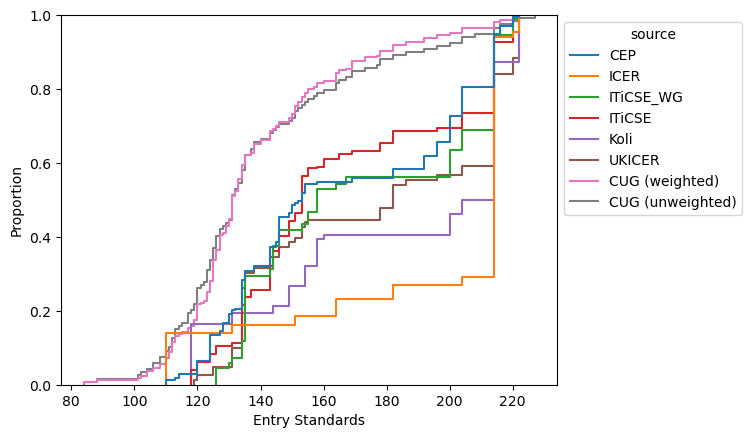

In [32]:
# make a new df combining affiliations and cug institutions so we can plot on one graph


ax = sns.ecdfplot(data=ecdf_df, x="Entry Standards", weights=ecdf_df.weight, hue="source")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#sns.ecdfplot(data=cug_domain_numbers, x="Entry Standards", weights=cug_domain_numbers.Number, ax=ax)


<Axes: xlabel='Continuation', ylabel='Proportion'>

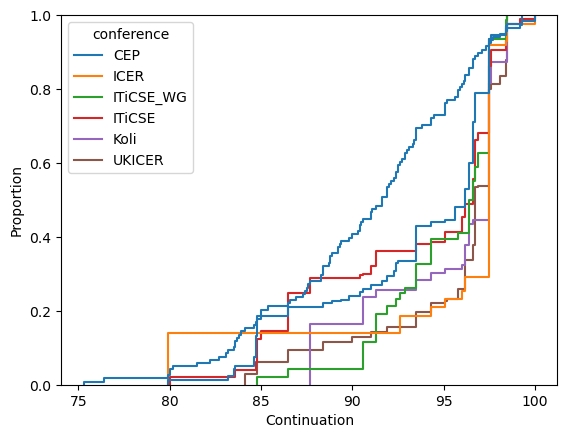

In [33]:
fig, ax = plt.subplots()

sns.ecdfplot(data=affiliations_cug, x="Continuation", weights=affiliations_cug.weight, hue="conference", ax=ax)


#sns.ecdfplot(data=cug_domain_numbers, x="Entry Standards", weights=cug_domain_numbers.Number, ax=ax)

sns.ecdfplot(data=cug_domain_numbers, x="Continuation", ax=ax)

In [34]:
affiliations_cug[(affiliations_cug.conference == "ICER") & (affiliations_cug["Entry Standards"].notnull())].sort_values("Entry Standards")

,institution,paper,weight,conference,doi,domain,name_x,Rank,Institution,Entry Standards,Student Satisfaction,Research Quality,Continuation,Graduate prospects outcomes,Graduate prospects on track,Overall Score,name_y
108,Middlesex University,ICER_2024_972169,1.000000,ICER,10.1145/3632621.3671417,mdx,Middlesex University,106.0,Middlesex University,110.0,3.30,2.61,79.9,67.0,52.0,71.2,Middlesex University
109,Middlesex University,ICER_2024_972169,1.000000,ICER,10.1145/3632621.3671417,mdx,Middlesex University,106.0,Middlesex University,110.0,3.30,2.61,79.9,67.0,52.0,71.2,Middlesex University
110,Middlesex University,ICER_2024_972169,1.000000,ICER,10.1145/3632621.3671417,mdx,Middlesex University,106.0,Middlesex University,110.0,3.30,2.61,79.9,67.0,52.0,71.2,Middlesex University
138,University of Kent,ICER_2019_401639,0.500000,ICER,10.1145/3291279.3339403,kent,University of Kent,40.0,University of Kent,131.0,2.93,3.39,94.3,85.0,77.0,83.4,University of Kent
125,Queen Mary University of London,ICER_2021_267539,0.500000,ICER,10.1145/3446871.3469751,qmul,Queen Mary University of London,27.0,Queen Mary University of London,151.0,3.02,3.65,95.1,83.0,82.0,86.6,Queen Mary University of London
136,"University of Nottingham, Faculty of Social Sc...",ICER_2019_092196,1.000000,ICER,10.1145/3291279.3339425,nottingham,NaN,24.0,University of Nottingham,164.0,3.02,3.50,92.6,89.0,86.0,87.7,University of Nottingham
113,King's College London,ICER_2023_440673,0.500000,ICER,10.1145/3568813.3600133,kcl,King's College London,10.0,"King's College London, University of London",182.0,2.95,3.56,96.2,97.0,89.0,91.6,NaN
122,King's College London,ICER_2022_268047,0.333333,ICER,10.1145/3501385.3543971,kcl,King's College London,10.0,"King's College London, University of London",182.0,2.95,3.56,96.2,97.0,89.0,91.6,NaN
131,University of Warwick,ICER_2020_162856,0.200000,ICER,10.1145/3372782.3406279,warwick,University of Warwick,5.0,University of Warwick,204.0,3.01,3.75,96.0,93.0,86.0,93.4,University of Warwick
133,University of Warwick,ICER_2019_043364,0.250000,ICER,10.1145/3291279.3339409,warwick,University of Warwick,5.0,University of Warwick,204.0,3.01,3.75,96.0,93.0,86.0,93.4,University of Warwick


In [137]:
# weighted mean
for characteristic in ['Entry Standards']:
    characteristic_mean = cug_domain_numbers[characteristic].mean()
    print ("CUG", characteristic, "mean", characteristic_mean)
    characteristic_std = cug_domain_numbers[characteristic].std()
    print ("CUG", characteristic, "std", characteristic_std)

    print ("CUG", characteristic, "weighted mean", (cug_domain_numbers[characteristic]*cug_domain_numbers['Number']).sum() / cug_domain_numbers['Number'].sum())
#    print ("CUG", characteristic, "median", cug_df[characteristic].median())

    for conference in scopus_conferences + ["ITiCSE_WG"]:
        conf_affils_cug = affiliations_cug[affiliations_cug.conference == conference]

        affil_weighted_mean =  (conf_affils_cug[characteristic] * conf_affils_cug['weight']).sum() / conf_affils_cug['weight'].sum()
        affil_z = (affil_weighted_mean - characteristic_mean)/characteristic_std
        print(conference, characteristic, "weighted mean", affil_weighted_mean, "z", affil_z)
#        affil_weighted_median = wquantiles.median(conf_affils_cug[characteristic], conf_affils_cug['weight'])
#        print(conference, characteristic, "weighted median", affil_weighted_median)

# student numbers

cug_numbers_mean = cug_domain_numbers['Number'].mean()
print ("CUG", "mean numbers", cug_numbers_mean)
cug_numbers_std = cug_domain_numbers['Number'].std()
print ("CUG", "std numbers", cug_numbers_std)

for conference in scopus_conferences + ["ITiCSE_WG"]:
    conf_affils_cug = affiliations_cug_numbers[affiliations_cug_numbers.conference == conference]
    conf_affils_numbers_mean = conf_affils_cug['Number'].mean()
    conf_affils_numbers_z = (conf_affils_numbers_mean - cug_numbers_mean)/cug_numbers_std
    print (conference, "mean numbers", conf_affils_numbers_mean, "z", conf_affils_numbers_z)


CUG Entry Standards mean 140.16806722689077
CUG Entry Standards std 30.45038179263893
CUG Entry Standards weighted mean 139.19113867243277
CEP Entry Standards weighted mean 150.84300595238096 z 0.3505683047977662
ICER Entry Standards weighted mean 180.23733719247468 z 1.3158872765027285
ITiCSE Entry Standards weighted mean 154.00405874791454 z 0.45437826084559907
Koli Entry Standards weighted mean 169.35556811758056 z 0.9585265987615817
UKICER Entry Standards weighted mean 157.73914782956592 z 0.577039746901393
ITiCSE_WG Entry Standards weighted mean 155.2065725576473 z 0.49386918801760077
CUG mean numbers 1056.5086206896551
CUG std numbers 632.5116324166922
CEP mean numbers 1241.8373493975903 z 0.29300445906399153
ICER mean numbers 1369.655172413793 z 0.49508425722966015
ITiCSE mean numbers 1154.537037037037 z 0.15498278817867134
Koli mean numbers 1087.8125 z 0.04949138910021216
UKICER mean numbers 1183.781512605042 z 0.20121826286277822
ITiCSE_WG mean numbers 1100.0 z 0.0687598094349

<Axes: xlabel='Number', ylabel='Entry Standards'>

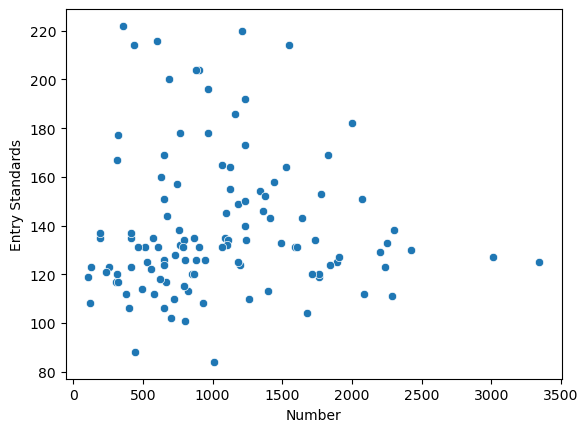

In [125]:
sns.scatterplot(data=cug_domain_numbers, x="Number", y ="Entry Standards")

<Axes: xlabel='Number', ylabel='Research Quality'>

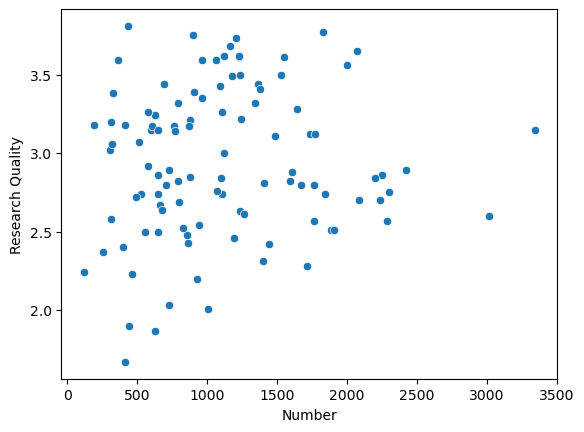

In [146]:
sns.scatterplot(data=cug_domain_numbers, x="Number", y ="Research Quality")

In [36]:
# 1st and 3rd quartiles CUG (unweighted and weighted)
print(cug_df['Entry Standards'].quantile([0.25,0.75]))
print(wquantiles.quantile(cug_domain_numbers[cug_domain_numbers.Number>0]['Entry Standards'], cug_domain_numbers[cug_domain_numbers.Number>0].Number,0.25))
print(wquantiles.quantile(cug_domain_numbers[cug_domain_numbers.Number>0]['Entry Standards'], cug_domain_numbers[cug_domain_numbers.Number>0].Number,0.75))

0.25    120.0
0.75    153.0
Name: Entry Standards, dtype: float64
123.1692546583851
151.0


In [37]:
affiliations_grouped = affiliations_cug.groupby(["conference", "domain"])["weight"].sum().reset_index()

In [38]:
affiliations_grouped[affiliations_grouped['conference']=="ITiCSE"].sort_values("weight")

,conference,domain,weight
60,ITiCSE,gcu,0.090909
68,ITiCSE,lincoln,0.090909
52,ITiCSE,aber,0.166667
53,ITiCSE,abertay,0.200000
55,ITiCSE,bath,0.200000
56,ITiCSE,cam,0.250000
73,ITiCSE,ox,0.250000
76,ITiCSE,sheffield,0.333333
72,ITiCSE,open,0.342857
77,ITiCSE,shu,0.500000


In [39]:
affiliations_grouped.sort_values("weight")

,conference,domain,weight
82,ITiCSE_WG,cam,0.076923
90,ITiCSE_WG,kent,0.083333
101,ITiCSE_WG,sussex,0.083333
60,ITiCSE,gcu,0.090909
97,ITiCSE_WG,open,0.090909
...,...,...,...
121,UKICER,cam,8.583333
146,UKICER,swansea,11.083333
13,CEP,gla,12.416667
44,ICER,gla,13.500000


In [393]:
papers_df.to_csv("papers.csv")